## کاوش در داده‌های CareerCon 2019

---

این داده‌ها مربوط به یک مسابقه می‌باشد که در سال ۲۰۱۹ برگزار شد و هدف از آن تشخیص سطح که آن‌ها بر روی آن ایستاده اند بوده است. حال این تشخیص می‌بایست به وسیله واحدهای اندازه گیری درونی ربات انجام می‌شود و با توجه به آن سطحی که بر روی ایستاده است را تشخیص بدهدو گزارش نماید.

این داده‌های جمع آوری شده از واحد‌های اندازه گیری درونی ربات توسط سنسوری جمع آوری شده است. یک ربات کوچک بر روی سطوح متفاوت حرکت کرده است و این داده به این نحو جمع‌آوری شده‌اند. در مجموع ۹ نوع سطح در این مجموعه داده وجود دارد و وظیفه و هدف نهایی پیش‌بینی سطحی است که ربات در آن در حال حرکت است.ربات از سنسورهایی همچون سرعت و شتاب استفاده می‌کند. چنانچه سطح درست تشخیص داده شود ربات قادر خواهد در جهت درست حرکت کند و تعادلش را از دست ندهد و واژگون نشود.

# داده‌های داده شده در این مجموعه داده

داده ورودی این مجموعه داده که به صورت یک فایل جدا شده با کاما (همانند اکسل) داده شده است که ۱۰ سیگنال از ۱۰ کانال سنسورهای ربات را دریافت می‌کند و ۱۲۸ نمونه‌گیری در هر سری زمانی انجام می‌دهد و سه ستون شناسه نیز به آن باید اضافه کرد که به شرح زیر است: 


- ```row_id```: شناسه یک ردیف.

- ```series_id: ID```: شناسه برای سری اندازه گیری کلید خارجی y_train/sample_submission.

- ```measurement_number```: شماره اندازه گیری در داخل سری.

کانال‌های جهت‌یابی وضعیت کنونی زوایا و این که چگونه یک ربات به عنوان یک جسم چهارگوش جهت گیری کرده است را رمز نگاری می‌کنند.

سرعت زاویه‌ای وضعیت زوایا و سریع حرکت را تشریح می‌کند و شتاب خطی چگونگی تغییر سرعت در طول زمان را تشریح می‌کند.

ده کانال سنسور موجود در این مجموعه به شرح زیر می‌باشند:


```
orientation_X

orientation_Y

orientation_Z

orientation_W

angular_velocity_X

angular_velocity_Y

angular_velocity_Z

linear_acceleration_X

linear_acceleration_Y

linear_acceleration_Z
```

**y_train.csv** - سطوح مجموعه آموزشی

- ```series_id```: شناسه برای سری اندازه گیری.

- ```group_id```: شماره شناسه برای همه اندازه گیری های انجام شده در طول ذخیره یک مجموعه داده. فقط برای مجموعه آموزشی داده شده است تا آن را قادر ساز بتواند از روش‌هایی همچون صحت سنجی متقابل استفاده کند.

- ```surface```: هدف یافتن همین مقدار است. یعنی ما بتوانیم سطح را تشخیص دهیم.

**sample_submission.csv** - یه نمونه فایل از فرمت صحیح داده ارسال شده برای شرکت در مسابقه که برای پروژه فعلی ما موضوعیت ندارد.

### اضافه کردن بسته‌هایی که نیاز به آن‌ها داریم

در این کلیه بسته‌هایی که برای کاوش این مجموعه نیاز داریم را اضافه می‌کنیم:

In [1]:
import numpy as np 
import pandas as pd 
import os
from time import time
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
%matplotlib inline
le = preprocessing.LabelEncoder()
from numba import jit
import itertools
from seaborn import countplot,lineplot, barplot
from numba import jit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.style as style 
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()

### اضافه کردن داده‌ها

در این‌جا کلیه داده‌های مجموعه داده را دریافت می‌کنیم و از آنها استفاده خواهیم کرد.

*از آنجایی که این داده‌ها در حال تحلیل بر روی سایت کگل هستند مسیر ورودی‌ها می‌تواند متفاوت باشد.*

برای خواندن داده‌ها از کتابخانه پاندا استفاده می‌کنیم.

In [2]:
data = pd.read_csv('../input/career-con-2019/X_train.csv')
tr = pd.read_csv('../input/career-con-2019/X_train.csv')
sub = pd.read_csv('../input/career-con-2019/sample_submission.csv')
test = pd.read_csv('../input/career-con-2019/X_test.csv')
target = pd.read_csv('../input/career-con-2019/y_train.csv')

# اکتشاف اولیه داده‌های مجموعه داده

پنج ردیف اول داده‌های آموزش را در اینجا نمایش می‌دهیم. این کار می‌تواند به درک بهتر و اولیه از داده کمک کند.

In [3]:
data.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


همین کار را با داده تست تکرار میکنیم تا دیدی مشابه نسبت به داده تست هم به دست بیاوریم. 

In [4]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,0.91208,-0.38193,-0.050618,0.14028,-0.060205,0.071286,-0.18787,0.29492,2.8027,-9.6816
1,0_1,0,1,0.91220,-0.38165,-0.050573,0.14028,-0.033486,0.060210,-0.18206,0.14944,2.5408,-9.8521
2,0_2,0,2,0.91228,-0.38143,-0.050586,0.14032,-0.029686,0.029476,-0.18441,-0.49741,2.5853,-9.3835
3,0_3,0,3,0.91237,-0.38121,-0.050588,0.14035,-0.024217,0.037788,-0.18783,-0.32376,2.9966,-8.7415
4,0_4,0,4,0.91247,-0.38096,-0.050546,0.14042,-0.038047,0.083405,-0.20170,-0.70103,2.6498,-8.8432


و در آخر نیز ۵ ردیف اول داده نهایی خروجی بر روی داده‌های آموزشی می‌توانیم مشاهده کنیم:

In [5]:
target.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


هر سری یا دنباله ۱۲۸ اندازه گیری دارد پس نتیجه که باید به یاد داشته باشیم:

**یک سری = ۱۲۸ اندازه گیری**. 

برای مثال، سری با شماره سری صفر یک سطح بتن ریز دارد و ۱۲۸ اندازه گیری دارد. 

In [6]:
len(data.measurement_number.value_counts())

128

### توصیف کلی داده

با استفاده از متد زیر می‌توانیم اطلاعات کلی‌تری نسبت به قبل برای مجموعه داده کسب کنیم. در اینجا اطلاعاتی مانند میانگین و نحوه توزیع داده‌ها هم به ما نمایش داده می‌شود.

In [7]:
data.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [8]:
test.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000
mean,1907.500000,63.500000,0.031996,0.120651,0.018735,0.004024,0.000401,0.013669,-0.036101,0.125433,2.906588,-9.359811
std,1101.585403,36.949327,0.671977,0.714522,0.108481,0.100957,0.114485,0.089440,0.233791,1.832639,2.094727,2.802670
min,0.000000,0.000000,-0.989720,-0.989810,-0.154680,-0.156270,-2.403300,-1.193000,-1.458200,-35.040000,-107.480000,-83.173000
25%,953.750000,31.750000,-0.648130,-0.744503,-0.112660,-0.098435,-0.037396,-0.029865,-0.089842,-0.486233,2.052100,-10.125000
50%,1907.500000,63.500000,0.132910,0.397860,0.057271,0.022654,0.001107,0.007276,-0.008911,0.112490,2.900300,-9.361700
75%,2861.250000,95.250000,0.575270,0.803600,0.124770,0.083706,0.037827,0.051112,0.057876,0.727250,3.758000,-8.582075
max,3815.000000,127.000000,0.989320,0.988940,0.154250,0.152510,3.396600,1.150700,0.960280,36.628000,55.624000,59.633000


In [9]:
target.describe()

,series_id,group_id
count,3810.000000,3810.000000
mean,1904.500000,37.601312
std,1099.996591,20.982743
min,0.000000,0.000000
25%,952.250000,19.000000
50%,1904.500000,39.000000
75%,2856.750000,55.000000
max,3809.000000,72.000000


### داده‌ها خالی یا پرت را در داده می‌شماریم:

In [10]:
totalt = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
print ("Missing Data at Train")
missing_data.tail()

Missing Data at Train


,Total,Percent
orientation_Y,0,0.0
orientation_X,0,0.0
measurement_number,0,0.0
series_id,0,0.0
row_id,0,0.0


In [11]:
totalt = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
print ("Missing Data at Test")
missing_data.tail()

Missing Data at Test


,Total,Percent
orientation_Y,0,0.0
orientation_X,0,0.0
measurement_number,0,0.0
series_id,0,0.0
row_id,0,0.0


In [12]:
print ("Test has ", (test.shape[0]-data.shape[0])/128, "series more than Train")
dif = test.shape[0]-data.shape[0]
print ("Let's check this extra 6 series")
test.tail(768).describe()

Test has  6.0 series more than Train
Let's check this extra 6 series


,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3812.500000,63.500000,0.337003,-0.131644,-0.017085,0.050452,-0.000984,0.011186,-0.030018,0.184216,2.915913,-9.364381
std,1.708938,36.973369,0.508982,0.767389,0.115323,0.078381,0.094922,0.050507,0.099772,1.281583,1.772065,2.214824
min,3810.000000,0.000000,-0.451190,-0.901650,-0.138930,-0.065797,-0.400180,-0.170710,-0.272710,-7.314100,-3.502700,-19.655000
25%,3811.000000,31.750000,-0.204643,-0.882522,-0.131210,-0.040565,-0.037407,-0.011643,-0.083618,-0.314090,1.666375,-9.796600
50%,3812.500000,63.500000,0.439235,-0.421170,-0.056427,0.067505,0.002001,0.006310,-0.005417,0.208475,2.939450,-9.376150
75%,3814.000000,95.250000,0.894423,0.867718,0.133083,0.135965,0.038191,0.047069,0.035923,0.633742,3.721350,-9.005425
max,3815.000000,127.000000,0.903020,0.968250,0.146690,0.137700,0.456310,0.177270,0.188970,9.547000,10.233000,3.052800


In [13]:
target.groupby('group_id').surface.nunique().max()

1

In [14]:
target['group_id'].nunique()

73

هر شماره گروهی تنها یک نوع سطح دارد
در نمودار زیر همین مورد را مشاهده می‌کنیم.

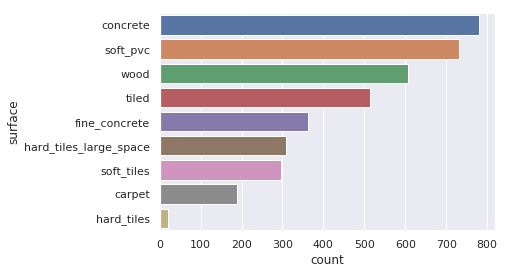

In [15]:
sns.set(style='darkgrid')
sns.countplot(y = 'surface',
              data = target,
              order = target['surface'].value_counts().index)
plt.show()

حال می‌توانیم همین نسبت گفته شده را در شماره گروه و سطح مشاهده کنیم.

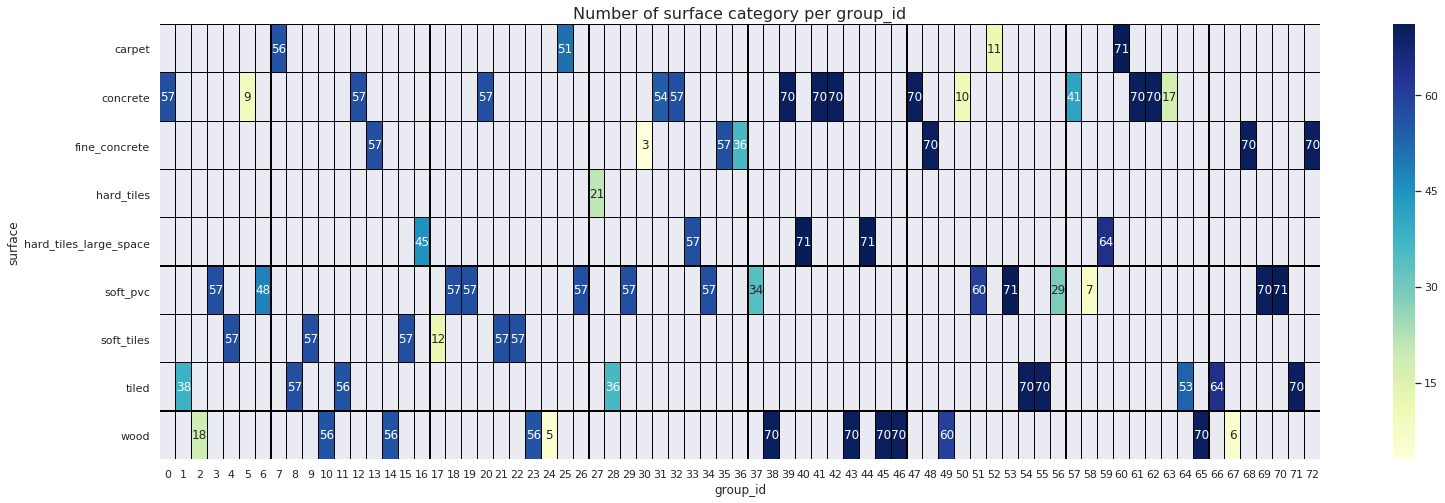

In [16]:
fig, ax = plt.subplots(1,1,figsize=(26,8))
tmp = pd.DataFrame(target.groupby(['group_id', 'surface'])['series_id'].count().reset_index())
m = tmp.pivot(index='surface', columns='group_id', values='series_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of surface category per group_id', size=16)
plt.show()

مساله ما به شکل چند کلاسه با چند خروجی تبدیل می‌شود که قصد نهایی تشخیص سطح زیر ربات است.

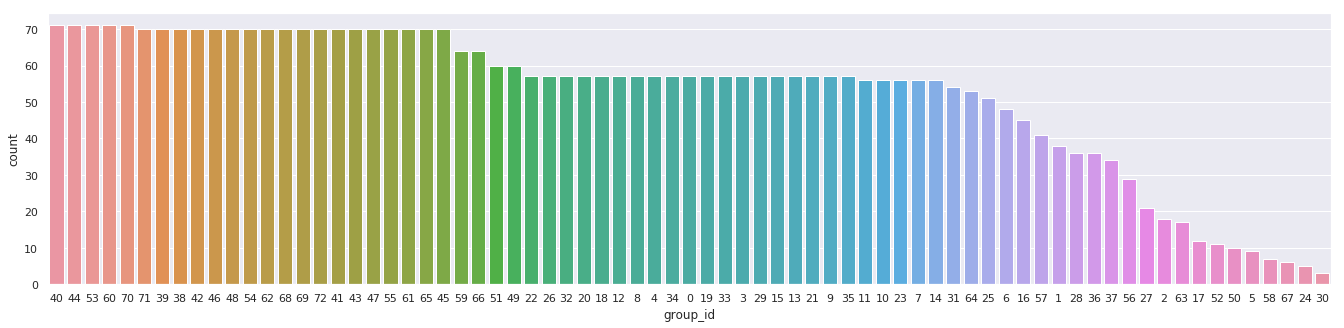

In [17]:
plt.figure(figsize=(23,5)) 
sns.set(style="darkgrid")
countplot(x="group_id", data=target, order = target['group_id'].value_counts().index)
plt.show()

حال اگر فقط به یک سری نگاه کنیم می‌توانیم داده‌های بیشتری از آن استخراج کنیم مانند:

In [18]:
serie1 = tr.head(128)
serie1.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [19]:
serie1.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.0,63.500000,-0.758666,-0.634008,-0.105474,-0.106470,-0.002481,-0.003306,0.007532,0.263418,2.984195,-9.320391
std,0.0,37.094474,0.000363,0.000471,0.000432,0.000389,0.052800,0.031544,0.017127,0.911175,1.387790,1.095040
min,0.0,0.000000,-0.759530,-0.634560,-0.106140,-0.107050,-0.160410,-0.079404,-0.030181,-1.864400,0.075417,-12.512000
25%,0.0,31.750000,-0.758927,-0.634383,-0.105873,-0.106775,-0.029069,-0.027110,-0.005289,-0.362872,1.791050,-9.875850
50%,0.0,63.500000,-0.758530,-0.634270,-0.105500,-0.106555,-0.005082,-0.004037,0.006842,0.231665,3.407550,-9.429950
75%,0.0,95.250000,-0.758367,-0.633530,-0.105077,-0.106130,0.035803,0.020031,0.020088,0.905635,4.119200,-8.633425
max,0.0,127.000000,-0.758220,-0.633060,-0.104610,-0.105590,0.107650,0.072698,0.051720,2.853800,5.386400,-6.268100


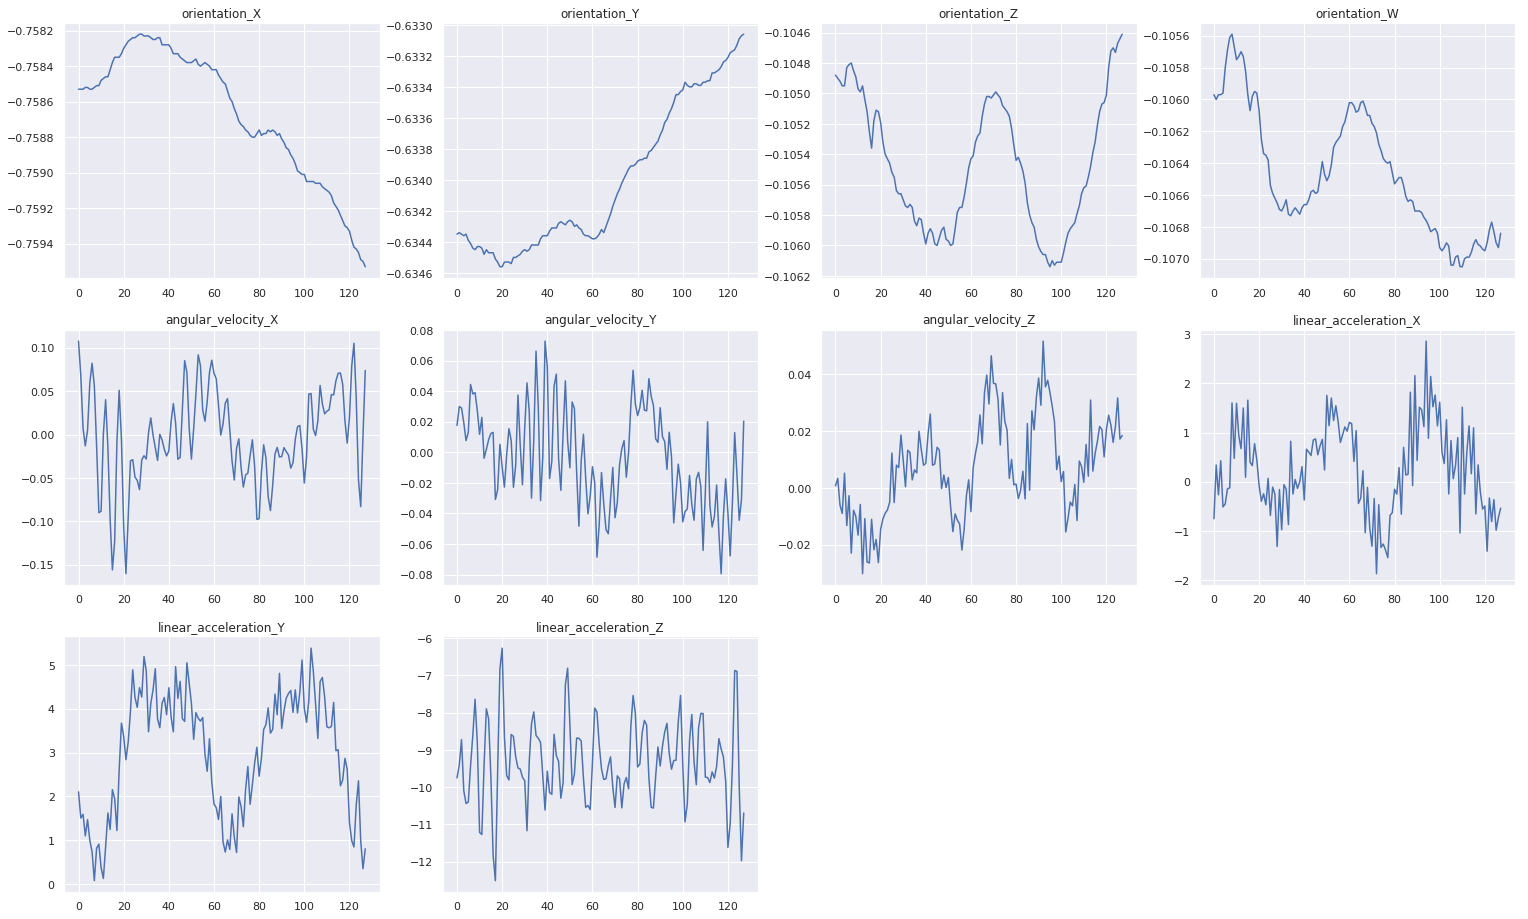

In [20]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(serie1.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(serie1[col])
    plt.title(col)

در یک سری از کل مجموعه آموزشی میتوانیم چند نکته را استخراج کنیم:

۱. جهت قرار گیری در محور افقی
۲. جهت قرار گیری در محور عمودی
۳. هیچ گونه ارتباط معنا داری بین داده‌ها به غیر از linear_acceleration_Y وجود ندارد.

همچنین میدانیم که سطح قرارگیری رباط در این سری اول انتخاب شده بوده است:

fine_concrete

In [21]:
target.head(1)

,series_id,group_id,surface
0,0,13,fine_concrete


In [22]:
del serie1
gc.collect()

34040

### ارتباط مابین داده‌ها

نمودار گرمایی یکی از بهترین نمودارها برای کشیدن ارتباط ویژگی‌های مختلف یک مجموعه داده است.

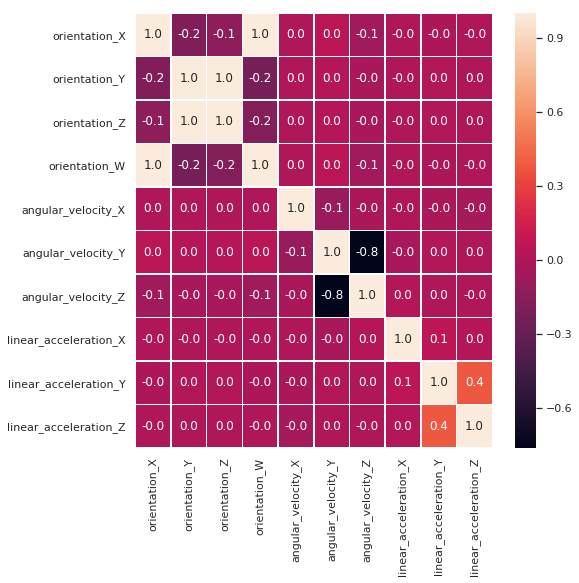

In [23]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(tr.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

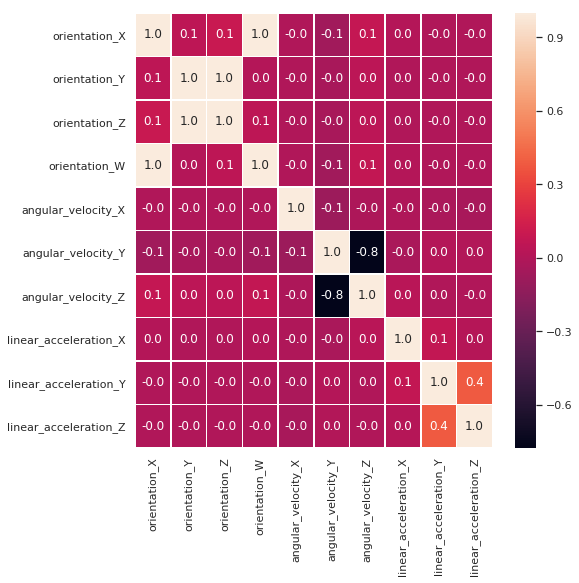

In [24]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(test.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

از این نمودار بالای ویژگی‌های زیر را می‌توان مشاهده کرد:

- angular_velocity_Z و angular_velocity_Y
- orientation_X و orientation_Y
- orientation_Y و orientation_Z

In [25]:
train_x = pd.read_csv('../input/career-con-2019/X_train.csv')
train_y = pd.read_csv('../input/career-con-2019/y_train.csv')

In [26]:
import math

def prepare_data(t):
    def f(d):
        d=d.sort_values(by=['measurement_number'])
        return pd.DataFrame({
         'lx':[ d['linear_acceleration_X'].values ],
         'ly':[ d['linear_acceleration_Y'].values ],
         'lz':[ d['linear_acceleration_Z'].values ],
         'ax':[ d['angular_velocity_X'].values ],
         'ay':[ d['angular_velocity_Y'].values ],
         'az':[ d['angular_velocity_Z'].values ],
        })

    t= t.groupby('series_id').apply(f)

    def mfft(x):
        return [ x/math.sqrt(128.0) for x in np.absolute(np.fft.fft(x)) ][1:65]

    t['lx_f']=[ mfft(x) for x in t['lx'].values ]
    t['ly_f']=[ mfft(x) for x in t['ly'].values ]
    t['lz_f']=[ mfft(x) for x in t['lz'].values ]
    t['ax_f']=[ mfft(x) for x in t['ax'].values ]
    t['ay_f']=[ mfft(x) for x in t['ay'].values ]
    t['az_f']=[ mfft(x) for x in t['az'].values ]
    return t

In [27]:
t=prepare_data(train_x)
t=pd.merge(t,train_y[['series_id','surface','group_id']],on='series_id')
t=t.rename(columns={"surface": "y"})

In [28]:
def aggf(d, feature):
    va= np.array(d[feature].tolist())
    mean= sum(va)/va.shape[0]
    var= sum([ (va[i,:]-mean)**2 for i in range(va.shape[0]) ])/va.shape[0]
    dev= [ math.sqrt(x) for x in var ]
    return pd.DataFrame({
        'mean': [ mean ],
        'dev' : [ dev ],
    })

display={
'hard_tiles_large_space':'r-.',
'concrete':'g-.',
'tiled':'b-.',

'fine_concrete':'r-',
'wood':'g-',
'carpet':'b-',
'soft_pvc':'y-',

'hard_tiles':'r--',
'soft_tiles':'g--',
}

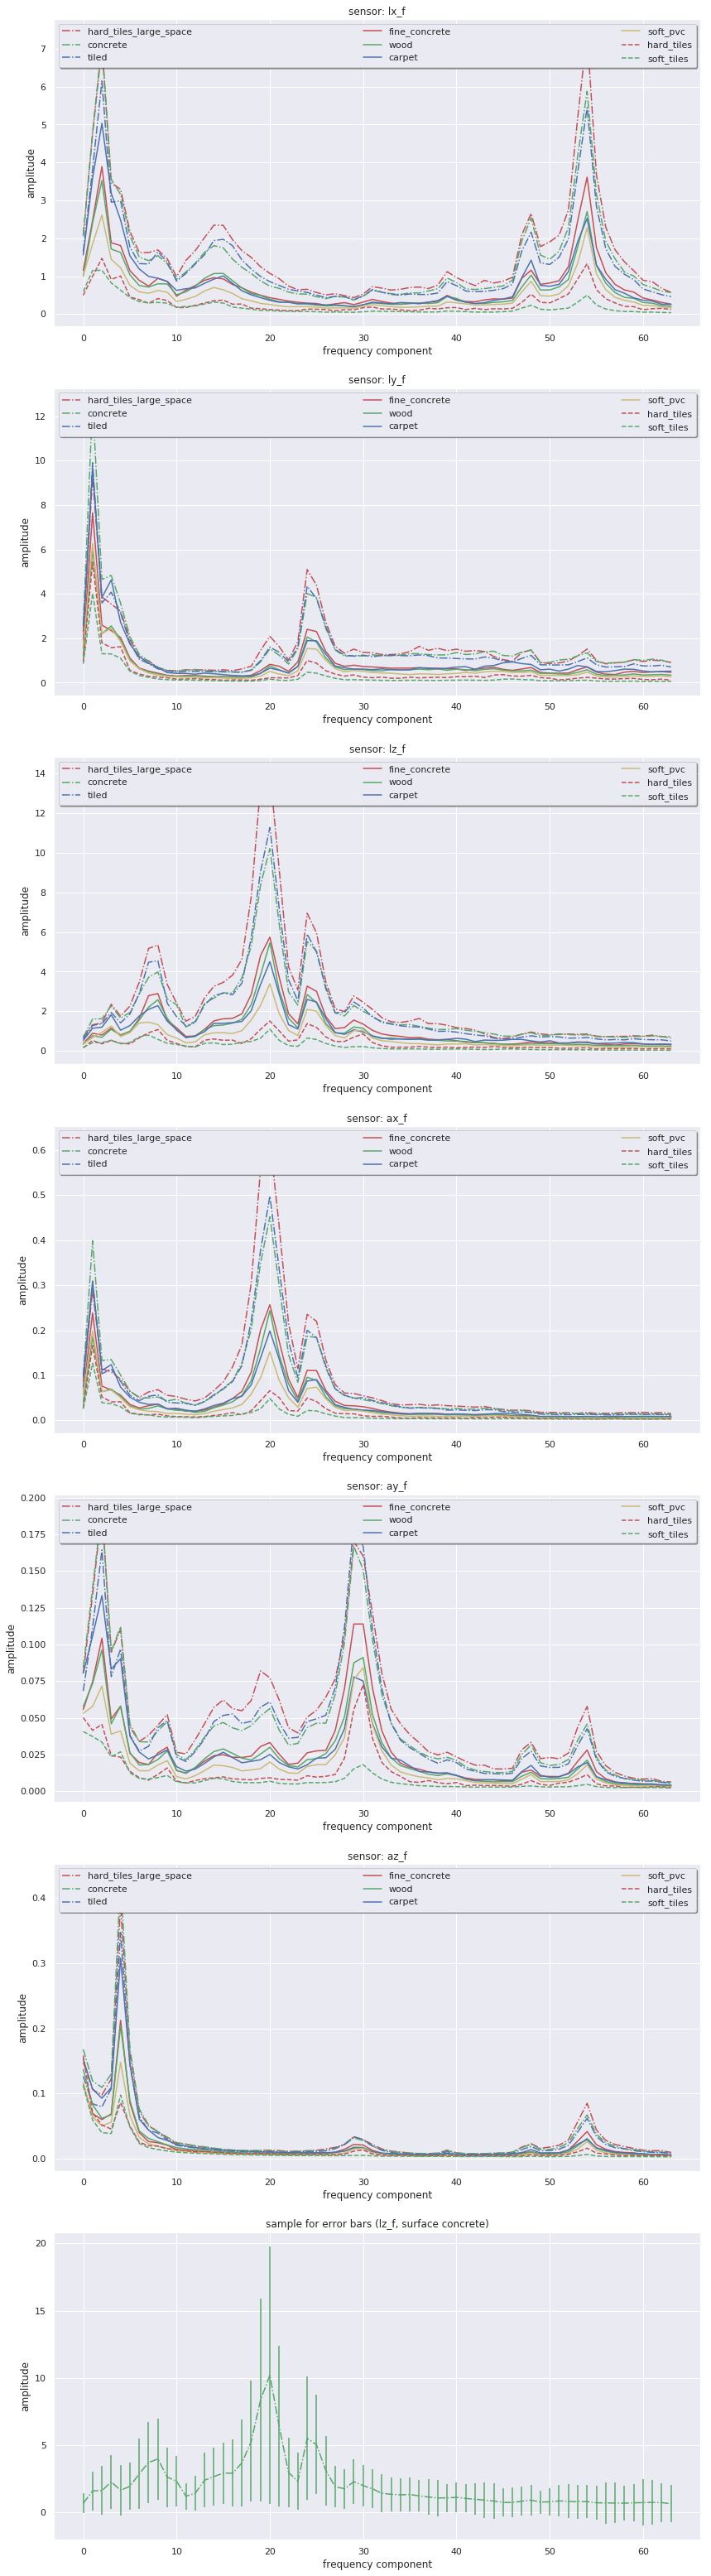

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8*7))

features=['lx_f','ly_f','lz_f','ax_f','ay_f','az_f']
count=0

for feature in features:
    stat= t.groupby('y').apply(aggf,feature)
    stat.index= stat.index.droplevel(-1)
    b=[*range(len(stat.at['carpet','mean']))]

    count+=1
    plt.subplot(len(features)+1,1,count)
    for i,(k,v) in enumerate(display.items()):
        plt.plot(b, stat.at[k,'mean'], v, label=k)
        # plt.errorbar(b, stat.at[k,'mean'], yerr=stat.at[k,'dev'], fmt=v)
   
    leg = plt.legend(loc='best', ncol=3, mode="expand", shadow=True, fancybox=True)
    plt.title("sensor: " + feature)
    plt.xlabel("frequency component")
    plt.ylabel("amplitude")

count+=1
plt.subplot(len(features)+1,1,count)
k='concrete'
v=display[k]
feature='lz_f'
stat= t.groupby('y').apply(aggf,feature)
stat.index= stat.index.droplevel(-1)
b=[*range(len(stat.at['carpet','mean']))]

plt.errorbar(b, stat.at[k,'mean'], yerr=stat.at[k,'dev'], fmt=v)
plt.title("sample for error bars (lz_f, surface concrete)")
plt.xlabel("frequency component")
plt.ylabel("amplitude")

plt.show()

In [30]:
del train_x, train_y
gc.collect()

29

**شتاب**
- X (میانه 0)
- Y در مرکز جهتی است که حرکت در آن صورت میگیرد
- Z در مرکز ۱۰ قرار میگیرد که همان شتاب جاذبه است.

---

# انتخاب ویژگی

در این قسمت می‌خواهیم تصمیم بگیریم کدام ویژگی را باید اهمیت بیشتری به آن بدهیم و به کدام ويژگی اهمیت کمتری بدهیم.

In [31]:
def plot_feature_distribution(df1, df2, label1, label2, features,a=2,b=5):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(17,9))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

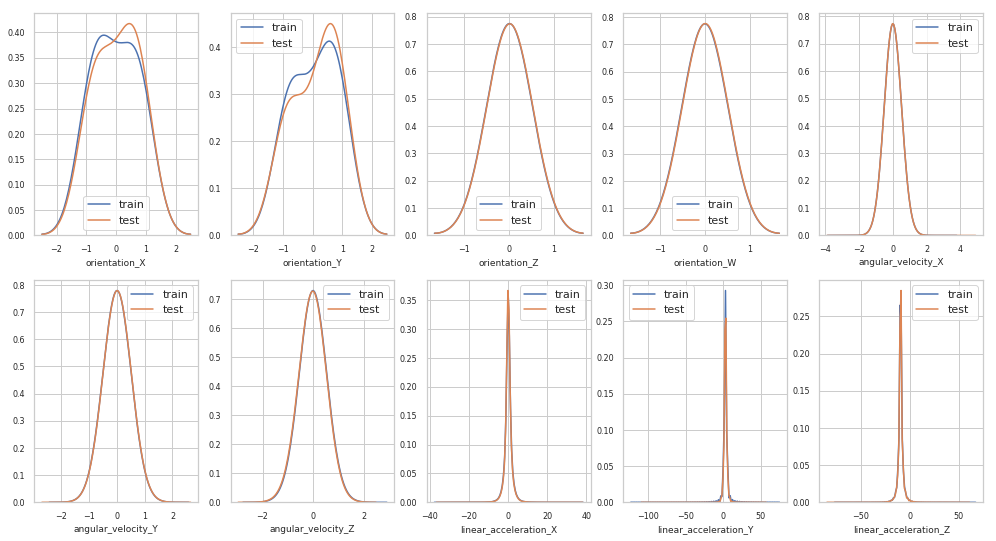

In [32]:
features = data.columns.values[3:]
plot_feature_distribution(data, test, 'train', 'test', features)

ویژگی‌های پایه ما یک توزیع نرمال یکسان را داده تست و آموزش دنبال می‌کنند که می‌تواند کمک کننده باشد. تنها در سه ويژگی یک تفاوت کوچک وجود دارد:

1. *orientation_X*
2. *orientation_Y* 
3. *linear_acceleration_Y*.

از آنجایی که سرعت زاویه‌ای و شتاب خطی با واحدهای متفاوتی اندازه گیری شده اند می‌توان به روش

**StandardScaler**

آن ها را در تغییراتشان با یکدیگر هماهنگ کرد.

In [33]:
def plot_feature_class_distribution(classes,tt, features,a=5,b=2):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(16,24))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        for clas in classes:
            ttc = tt[tt['surface']==clas]
            sns.kdeplot(ttc[feature], bw=0.5,label=clas)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

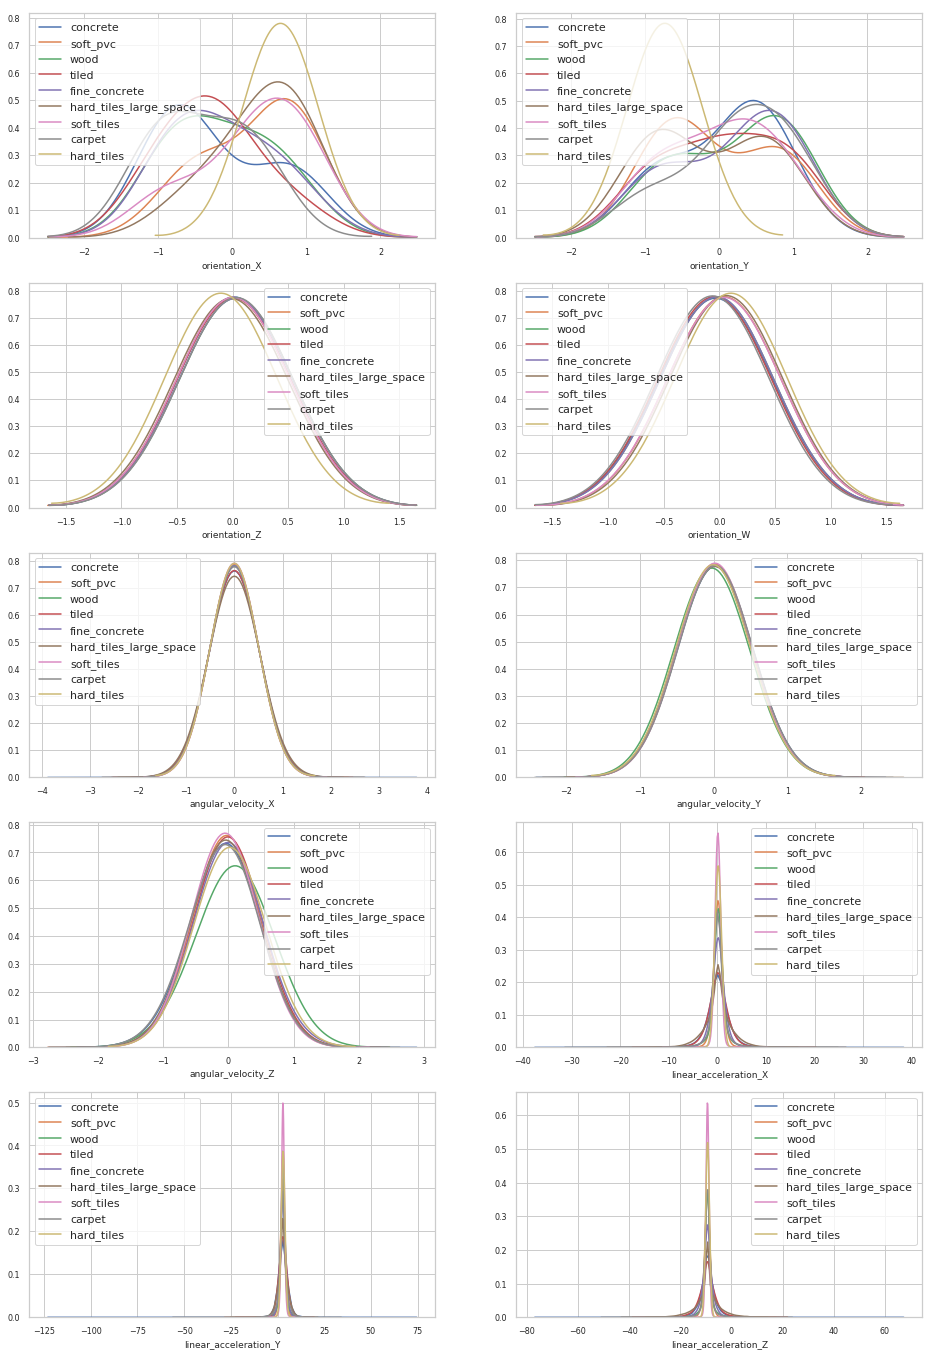

In [34]:
classes = (target['surface'].value_counts()).index
aux = data.merge(target, on='series_id', how='inner')
plot_feature_class_distribution(classes, aux, features)

**توزیع نرمال**

قطعا ما بین سطوح متفاوت تفاوت‌هایی وجود دارد. از همین تفاوت می‌توان برای دسته بندی آن‌ها استفاده کنیم.

حال که می‌دانیم همه ویژگی‌ها از یک توزیع نرمال پیروی می‌کنند ما می‌توانیم متغیرهای دیگری را به داده‌ها اضافه کنیم همچون میان، پراش، میانه و بازه تا بتوانیم داده‌ها را دقیق‌تر تحلیل کنیم.


### نمودارهای توزیع‌ها پس از نرمالیزه کردن

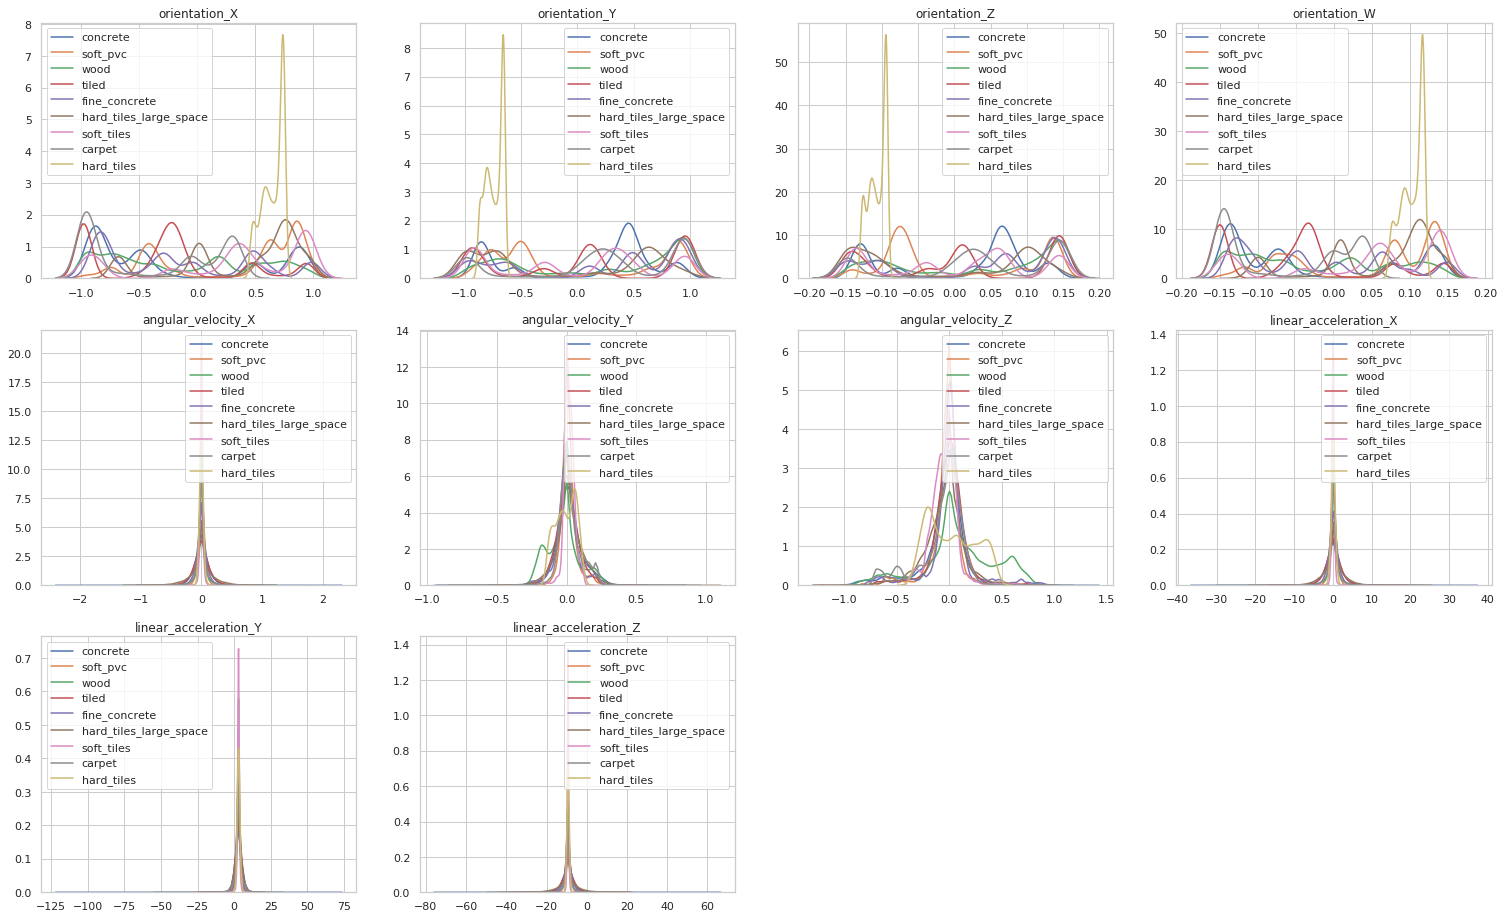

In [35]:
plt.figure(figsize=(26, 16))
for i,col in enumerate(aux.columns[3:13]):
    ax = plt.subplot(3,4,i+1)
    ax = plt.title(col)
    for surface in classes:
        surface_feature = aux[aux['surface'] == surface]
        sns.kdeplot(surface_feature[col], label = surface)

### هسیتوگرام آموزش و آزمایش

در اینجا می‌توان نگاهی به هیستوگرام داده‌های آموزش و آزمایش بر روی تک تک ویژگی‌های خام موجود در مجموعه داده کرد.

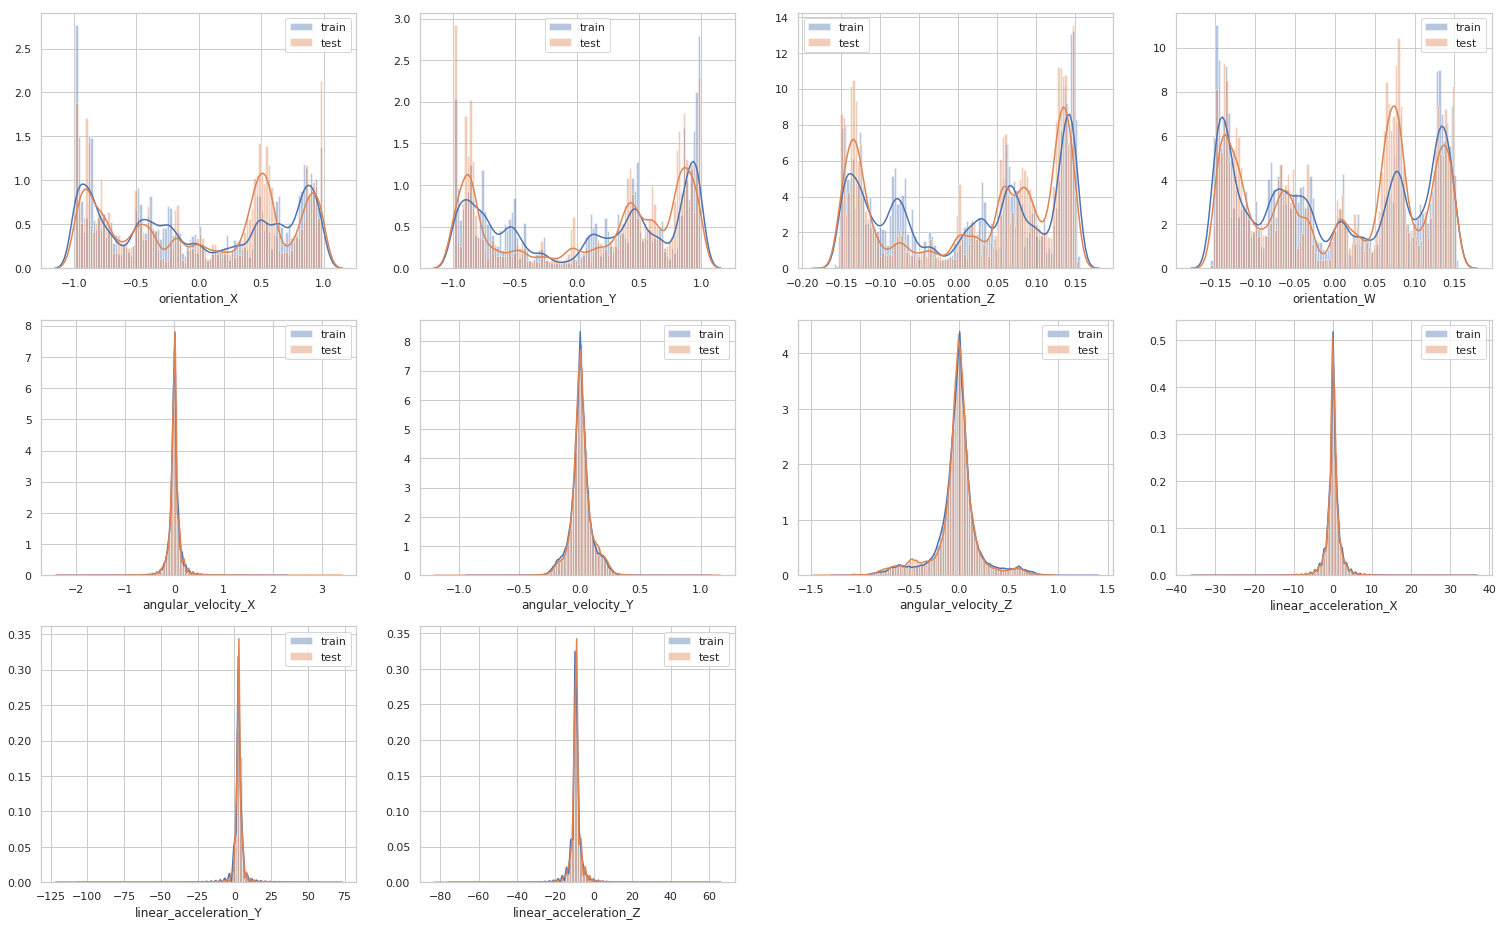

In [36]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(data.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.distplot(data[col], bins=100, label='train')
    sns.distplot(test[col], bins=100, label='test')
    ax.legend()   

##  چهارگان

از جهت یابی چهار گوش باید استفاده شود:

X, Y, Z, W

برای آنکه در پدیده‌ای به نام قفل گیمبال گرفتار نشویم باید مواقعی که جهت‌ها به سمت مثبت یا منفی ۹۰ درجه حرکت می‌کنند را بررسی کنیم.

برای همین میتوان از یک معیار جهت یابی دیگر به نام چهارگان استفاده کنیم که محاسبات آن سخت تر است ولی مشکل گیمبال را ندارد.

In [37]:
# https://stackoverflow.com/questions/53033620/how-to-convert-euler-angles-to-quaternions-and-get-the-same-euler-angles-back-fr
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

In [38]:
def fe_step0 (actual):
    
    # https://www.mathworks.com/help/aeroblks/quaternionnorm.html
    # https://www.mathworks.com/help/aeroblks/quaternionmodulus.html
    # https://www.mathworks.com/help/aeroblks/quaternionnormalize.html
    
    actual['norm_quat'] = (actual['orientation_X']**2 + actual['orientation_Y']**2 + actual['orientation_Z']**2 + actual['orientation_W']**2)
    actual['mod_quat'] = (actual['norm_quat'])**0.5
    actual['norm_X'] = actual['orientation_X'] / actual['mod_quat']
    actual['norm_Y'] = actual['orientation_Y'] / actual['mod_quat']
    actual['norm_Z'] = actual['orientation_Z'] / actual['mod_quat']
    actual['norm_W'] = actual['orientation_W'] / actual['mod_quat']
    
    return actual

به صورت کلی هر عملکردی که جهت‌های در سیستم چهارگان تولید می‌کند نیاز دارد که نرمالایز شود زیر اعداد اعشاری می‌تواند مشکل زا باشند.

این مشکل بیشتر مربوط زبان‌های برنامه نویسی است تا خود سیستم محاسبه جهات.

source: https://stackoverflow.com/questions/11667783/quaternion-and-normalization

In [39]:
data = fe_step0(data)
test = fe_step0(test)
print(data.shape)
data.head()

(487680, 19)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,norm_quat,mod_quat,norm_X,norm_Y,norm_Z,norm_W
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,0.999997,0.999999,-0.758531,-0.634351,-0.10488,-0.10597
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,0.999995,0.999998,-0.758532,-0.634342,-0.10490,-0.10600
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,1.000006,1.000003,-0.758528,-0.634348,-0.10492,-0.10597
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,1.000009,1.000005,-0.758516,-0.634357,-0.10495,-0.10597
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,0.999995,0.999997,-0.758522,-0.634352,-0.10495,-0.10596


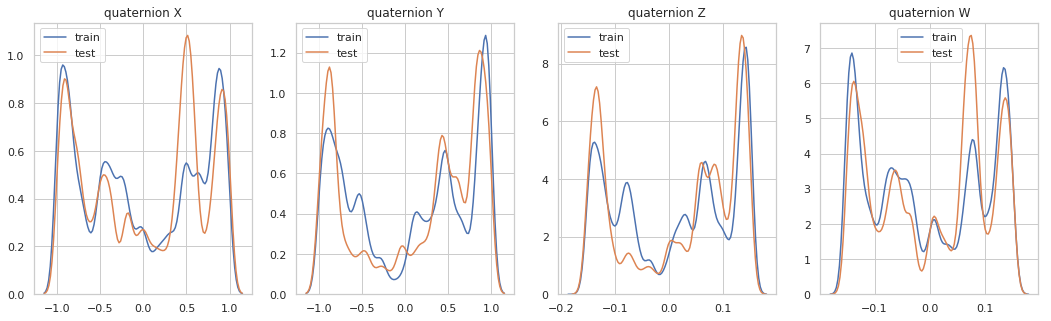

In [40]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 5))

ax1.set_title('quaternion X')
sns.kdeplot(data['norm_X'], ax=ax1, label="train")
sns.kdeplot(test['norm_X'], ax=ax1, label="test")

ax2.set_title('quaternion Y')
sns.kdeplot(data['norm_Y'], ax=ax2, label="train")
sns.kdeplot(test['norm_Y'], ax=ax2, label="test")

ax3.set_title('quaternion Z')
sns.kdeplot(data['norm_Z'], ax=ax3, label="train")
sns.kdeplot(test['norm_Z'], ax=ax3, label="test")

ax4.set_title('quaternion W')
sns.kdeplot(data['norm_W'], ax=ax4, label="train")
sns.kdeplot(test['norm_W'], ax=ax4, label="test")

plt.show()

## تبدیل چهارگان به اویلر

In [41]:
def fe_step1 (actual):
    """Quaternions to Euler Angles"""
    
    x, y, z, w = actual['norm_X'].tolist(), actual['norm_Y'].tolist(), actual['norm_Z'].tolist(), actual['norm_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    actual['euler_x'] = nx
    actual['euler_y'] = ny
    actual['euler_z'] = nz
    return actual

In [42]:
data = fe_step1(data)
test = fe_step1(test)
print (data.shape)
data.head()

(487680, 22)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,norm_quat,mod_quat,norm_X,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,0.999997,0.999999,-0.758531,-0.634351,-0.10488,-0.10597,2.843273,-0.024668,1.396667
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,0.999995,0.999998,-0.758532,-0.634342,-0.10490,-0.10600,2.843201,-0.024662,1.396651
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,1.000006,1.000003,-0.758528,-0.634348,-0.10492,-0.10597,2.843222,-0.024728,1.396677
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,1.000009,1.000005,-0.758516,-0.634357,-0.10495,-0.10597,2.843183,-0.024769,1.396712
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,0.999995,0.999997,-0.758522,-0.634352,-0.10495,-0.10596,2.843197,-0.024785,1.396698


![](https://d2gne97vdumgn3.cloudfront.net/api/file/UMYT4v0TyIgtyGm8ZXDQ)

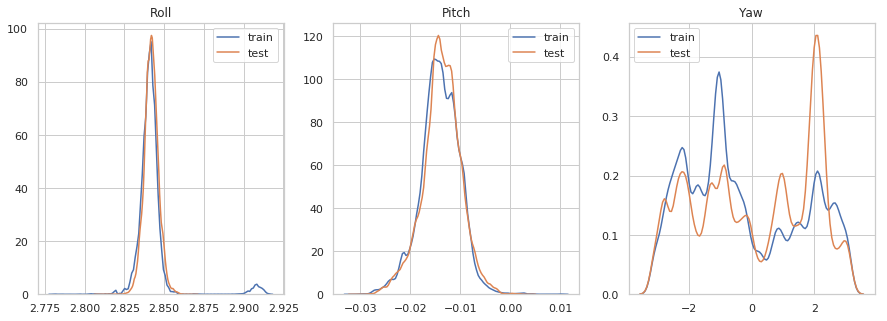

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.set_title('Roll')
sns.kdeplot(data['euler_x'], ax=ax1, label="train")
sns.kdeplot(test['euler_x'], ax=ax1, label="test")

ax2.set_title('Pitch')
sns.kdeplot(data['euler_y'], ax=ax2, label="train")
sns.kdeplot(test['euler_y'], ax=ax2, label="test")

ax3.set_title('Yaw')
sns.kdeplot(data['euler_z'], ax=ax3, label="train")
sns.kdeplot(test['euler_z'], ax=ax3, label="test")

plt.show()

حال اگر بر روی محور سوم کار کنیم (در سیستم اویلر) میتوانیم به روبات این قابلیت را بدهیم که در سطوح ناصاف نیز یک انعطاف از خود نشان بدهد.

این نکته از آن جا اهمیت دارد که سطوح موجود در این مجموعه داده می‌توانند مقداری با هم درمحور ارتفاع اختلاف به خاطر ماهیت جنس آن سطح داشته باشند.

In [44]:
data.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,norm_quat,mod_quat,norm_X,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,0.999997,0.999999,-0.758531,-0.634351,-0.10488,-0.10597,2.843273,-0.024668,1.396667
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,0.999995,0.999998,-0.758532,-0.634342,-0.10490,-0.10600,2.843201,-0.024662,1.396651
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,1.000006,1.000003,-0.758528,-0.634348,-0.10492,-0.10597,2.843222,-0.024728,1.396677
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,1.000009,1.000005,-0.758516,-0.634357,-0.10495,-0.10597,2.843183,-0.024769,1.396712
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,0.999995,0.999997,-0.758522,-0.634352,-0.10495,-0.10596,2.843197,-0.024785,1.396698


## ویژگی‌های پایه

در اینجا ویژگی‌های پایه علاوه ویژگی‌های اضافی که درباره‌ی آنها صحبت کردیم را ترکیب می‌کنیم.

In [45]:
def feat_eng(data):
    
    df = pd.DataFrame()
    data['totl_anglr_vel'] = (data['angular_velocity_X']**2 + data['angular_velocity_Y']**2 + data['angular_velocity_Z']**2)** 0.5
    data['totl_linr_acc'] = (data['linear_acceleration_X']**2 + data['linear_acceleration_Y']**2 + data['linear_acceleration_Z']**2)**0.5
    data['totl_xyz'] = (data['orientation_X']**2 + data['orientation_Y']**2 + data['orientation_Z']**2)**0.5
    data['acc_vs_vel'] = data['totl_linr_acc'] / data['totl_anglr_vel']
    
    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df[col + '_mean'] = data.groupby(['series_id'])[col].mean()
        df[col + '_median'] = data.groupby(['series_id'])[col].median()
        df[col + '_max'] = data.groupby(['series_id'])[col].max()
        df[col + '_min'] = data.groupby(['series_id'])[col].min()
        df[col + '_std'] = data.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        df[col + '_mean_abs_chg'] = data.groupby(['series_id'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        df[col + '_mean_change_of_abs_change'] = data.groupby('series_id')[col].apply(mean_change_of_abs_change)
        df[col + '_abs_max'] = data.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
    return df
    

In [46]:
%%time
data = feat_eng(data)
test = feat_eng(test)
print ("New features: ",data.shape)

New features:  (3810, 276)
CPU times: user 2min 2s, sys: 401 ms, total: 2min 2s
Wall time: 2min 1s


In [47]:
data.head()

,orientation_X_mean,orientation_X_median,orientation_X_max,orientation_X_min,orientation_X_std,orientation_X_range,orientation_X_maxtoMin,orientation_X_mean_abs_chg,orientation_X_mean_change_of_abs_change,orientation_X_abs_max,orientation_X_abs_min,orientation_X_abs_avg,orientation_Y_mean,orientation_Y_median,orientation_Y_max,orientation_Y_min,orientation_Y_std,orientation_Y_range,orientation_Y_maxtoMin,orientation_Y_mean_abs_chg,orientation_Y_mean_change_of_abs_change,orientation_Y_abs_max,orientation_Y_abs_min,orientation_Y_abs_avg,orientation_Z_mean,orientation_Z_median,orientation_Z_max,orientation_Z_min,orientation_Z_std,orientation_Z_range,orientation_Z_maxtoMin,orientation_Z_mean_abs_chg,orientation_Z_mean_change_of_abs_change,orientation_Z_abs_max,orientation_Z_abs_min,orientation_Z_abs_avg,orientation_W_mean,orientation_W_median,orientation_W_max,orientation_W_min,...,totl_anglr_vel_mean_change_of_abs_change,totl_anglr_vel_abs_max,totl_anglr_vel_abs_min,totl_anglr_vel_abs_avg,totl_linr_acc_mean,totl_linr_acc_median,totl_linr_acc_max,totl_linr_acc_min,totl_linr_acc_std,totl_linr_acc_range,totl_linr_acc_maxtoMin,totl_linr_acc_mean_abs_chg,totl_linr_acc_mean_change_of_abs_change,totl_linr_acc_abs_max,totl_linr_acc_abs_min,totl_linr_acc_abs_avg,totl_xyz_mean,totl_xyz_median,totl_xyz_max,totl_xyz_min,totl_xyz_std,totl_xyz_range,totl_xyz_maxtoMin,totl_xyz_mean_abs_chg,totl_xyz_mean_change_of_abs_change,totl_xyz_abs_max,totl_xyz_abs_min,totl_xyz_abs_avg,acc_vs_vel_mean,acc_vs_vel_median,acc_vs_vel_max,acc_vs_vel_min,acc_vs_vel_std,acc_vs_vel_range,acc_vs_vel_maxtoMin,acc_vs_vel_mean_abs_chg,acc_vs_vel_mean_change_of_abs_change,acc_vs_vel_abs_max,acc_vs_vel_abs_min,acc_vs_vel_abs_avg
series_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.758666,-0.758530,-0.75822,-0.75953,0.000363,0.00131,0.998275,0.000015,2.380952e-07,0.75953,0.75822,0.758875,-0.634008,-0.634270,-0.63306,-0.63456,0.000471,0.00150,0.997636,0.000018,0.000000e+00,0.63456,0.63306,0.633810,-0.105474,-0.105500,-0.104610,-0.106140,0.000432,0.001530,0.985585,0.000051,7.936508e-08,0.106140,0.104610,0.105375,-0.106470,-0.106555,-0.105590,-0.107050,...,0.000067,0.162384,0.010603,0.086494,9.939676,10.077860,12.575577,7.117152,0.989642,5.458424,1.766939,0.689030,0.006324,12.575577,7.117152,9.846364,0.994316,0.994306,0.994413,0.994253,0.000042,0.000160,1.000161,0.000006,7.240501e-08,0.994413,0.994253,0.994333,223.282937,187.471573,995.561076,56.133014,135.641510,939.428062,17.735749,114.896199,1.309785,995.561076,56.133014,525.847045
1,-0.958606,-0.958595,-0.95837,-0.95896,0.000151,0.00059,0.999385,0.000023,-4.761905e-07,0.95896,0.95837,0.958665,0.241867,0.241890,0.24270,0.24074,0.000499,0.00196,1.008142,0.000070,1.587302e-07,0.24270,0.24074,0.241720,0.031650,0.031688,0.032341,0.030504,0.000508,0.001837,1.060222,0.000048,3.253968e-07,0.032341,0.030504,0.031423,-0.146876,-0.146910,-0.145870,-0.148090,...,-0.001095,0.287947,0.020167,0.154057,10.082444,10.069950,16.986332,5.867993,1.826016,11.118339,2.894743,1.361058,-0.018901,16.986332,5.867993,11.427163,0.989155,0.989150,0.989305,0.988974,0.000077,0.000331,1.000334,0.000016,-2.398138e-07,0.989305,0.988974,0.989139,118.973908,98.477877,611.826712,32.938319,88.488750,578.888393,18.574922,57.943094,0.508448,611.826712,32.938319,322.382516
2,-0.512057,-0.512035,-0.50944,-0.51434,0.001377,0.00490,0.990473,0.000041,0.000000e+00,0.51434,0.50944,0.511890,-0.846171,-0.846210,-0.84490,-0.84779,0.000785,0.00289,0.996591,0.000024,-7.142857e-07,0.84779,0.84490,0.846345,-0.129371,-0.129405,-0.128520,-0.130300,0.000541,0.001780,0.986339,0.000059,-1.746032e-06,0.130300,0.128520,0.129410,-0.071082,-0.071139,-0.070378,-0.071535,...,-0.000471,0.170919,0.009871,0.090395,10.035741,10.082289,12.725500,6.794325,0.944637,5.931175,1.872960,0.711678,-0.001612,12.725500,6.794325,9.759913,0.997471,0.997467,0.997515,0.997438,0.000020,0.000078,1.000078,0.000004,-1.068346e-07,0.997515,0.997438,0.997477,190.13423

In [48]:
from scipy.stats import kurtosis
from scipy.stats import skew

def _kurtosis(x):
    return kurtosis(x)

def CPT5(x):
    den = len(x)*np.exp(np.std(x))
    return sum(np.exp(x))/den

def skewness(x):
    return skew(x)

def SSC(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1 
    xn_i1 = x[0:len(x)-2]  # xn-1
    ans = np.heaviside((xn-xn_i1)*(xn-xn_i2),0)
    return sum(ans[1:]) 

def wave_length(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1 
    return sum(abs(xn_i2-xn))
    
def norm_entropy(x):
    tresh = 3
    return sum(np.power(abs(x),tresh))

def SRAV(x):    
    SRA = sum(np.sqrt(abs(x)))
    return np.power(SRA/len(x),2)

def mean_abs(x):
    return sum(abs(x))/len(x)

def zero_crossing(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1
    return sum(np.heaviside(-xn*xn_i2,0))

In [49]:
def fe_advanced_stats(data):
    
    df = pd.DataFrame()
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        if 'orientation' in col:
            continue
            
        print ("FE on column ", col, "...")
        
        df[col + '_skew'] = data.groupby(['series_id'])[col].skew()
        df[col + '_mad'] = data.groupby(['series_id'])[col].mad()
        df[col + '_q25'] = data.groupby(['series_id'])[col].quantile(0.25)
        df[col + '_q75'] = data.groupby(['series_id'])[col].quantile(0.75)
        df[col + '_q95'] = data.groupby(['series_id'])[col].quantile(0.95)
        df[col + '_iqr'] = df[col + '_q75'] - df[col + '_q25']
        df[col + '_CPT5'] = data.groupby(['series_id'])[col].apply(CPT5) 
        df[col + '_SSC'] = data.groupby(['series_id'])[col].apply(SSC) 
        df[col + '_skewness'] = data.groupby(['series_id'])[col].apply(skewness)
        df[col + '_wave_lenght'] = data.groupby(['series_id'])[col].apply(wave_length)
        df[col + '_norm_entropy'] = data.groupby(['series_id'])[col].apply(norm_entropy)
        df[col + '_SRAV'] = data.groupby(['series_id'])[col].apply(SRAV)
        df[col + '_kurtosis'] = data.groupby(['series_id'])[col].apply(_kurtosis) 
        df[col + '_zero_crossing'] = data.groupby(['series_id'])[col].apply(zero_crossing) 
        
    return df

داده‌های دیگری که به داده‌های اصلی اضافه کردیم:

- تکرار بیشنیه مقدار
- تکرار کمینه مقدار
- شمارش مقادیر مثبت
- شمارش مقادیر منفی
- شمارش صفرها

In [50]:
basic_fe = ['linear_acceleration_X','linear_acceleration_Y','linear_acceleration_Z',
           'angular_velocity_X','angular_velocity_Y','angular_velocity_Z']

In [51]:
def fe_plus (data):
    
    aux = pd.DataFrame()
    
    for serie in data.index:
        #if serie%500 == 0: print ("> Serie = ",serie)
        
        aux = X_train[X_train['series_id']==serie]
        
        for col in basic_fe:
            data.loc[serie,col + '_unq'] = aux[col].round(3).nunique()
            data.loc[serie,col + 'ratio_unq'] = aux[col].round(3).nunique()/18
            try:
                data.loc[serie,col + '_freq'] = aux[col].value_counts().idxmax()
            except:
                data.loc[serie,col + '_freq'] = 0
            
            data.loc[serie,col + '_max_freq'] = aux[aux[col] == aux[col].max()].shape[0]
            data.loc[serie,col + '_min_freq'] = aux[aux[col] == aux[col].min()].shape[0]
            data.loc[serie,col + '_pos_freq'] = aux[aux[col] >= 0].shape[0]
            data.loc[serie,col + '_neg_freq'] = aux[aux[col] < 0].shape[0]
            data.loc[serie,col + '_nzeros'] = (aux[col]==0).sum(axis=0)

## یافتن ارتباط مابین داده‌ها

In [52]:
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_matrix = data.corr().abs()
raw_corr = data.corr()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
top_corr = pd.DataFrame(sol).reset_index()
top_corr.columns = ["var1", "var2", "abs corr"]
# with .abs() we lost the sign, and it's very important.
for x in range(len(top_corr)):
    var1 = top_corr.iloc[x]["var1"]
    var2 = top_corr.iloc[x]["var2"]
    corr = raw_corr[var1][var2]
    top_corr.at[x, "raw corr"] = corr

In [53]:
top_corr.head(15)

,var1,var2,abs corr,raw corr
0,norm_quat_max,norm_quat_abs_max,1.0,1.0
1,euler_x_max,euler_x_abs_max,1.0,1.0
2,norm_quat_min,norm_quat_abs_min,1.0,1.0
3,acc_vs_vel_max,acc_vs_vel_abs_max,1.0,1.0
4,mod_quat_max,mod_quat_abs_max,1.0,1.0
5,totl_anglr_vel_min,totl_anglr_vel_abs_min,1.0,1.0
6,totl_xyz_max,totl_xyz_abs_max,1.0,1.0
7,euler_x_min,euler_x_abs_min,1.0,1.0
8,totl_xyz_min,totl_xyz_abs_min,1.0,1.0
9,mod_quat_min,mod_quat_abs_min,1.0,1.0


### جایگذاری مقادیر پرت

مقادیر خالی از مقدار و یا مقادیر بینهایت را با صفر جایگذاری میکنیم تا توزیع داده‌ها به نخورد.

In [54]:
data.fillna(0,inplace=True)
test.fillna(0,inplace=True)
data.replace(-np.inf,0,inplace=True)
data.replace(np.inf,0,inplace=True)
test.replace(-np.inf,0,inplace=True)
test.replace(np.inf,0,inplace=True)

## رمزگذاری برچسب‌ها

In [55]:
target.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [56]:
target['surface'] = le.fit_transform(target['surface'])

In [57]:
target['surface'].value_counts()

1    779
5    732
8    607
7    514
2    363
4    308
6    297
0    189
3     21
Name: surface, dtype: int64

In [58]:
target.head()

,series_id,group_id,surface
0,0,13,2
1,1,31,1
2,2,20,1
3,3,31,1
4,4,22,6


# اجرای مدل

In [59]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=59)

In [60]:
predicted = np.zeros((test.shape[0],9))
measured= np.zeros((data.shape[0]))
score = 0

برای پیش بینی سطح از جنگل تصادفی استفاده میکنیم.

Fold: 0 score: 0.9246753246753247


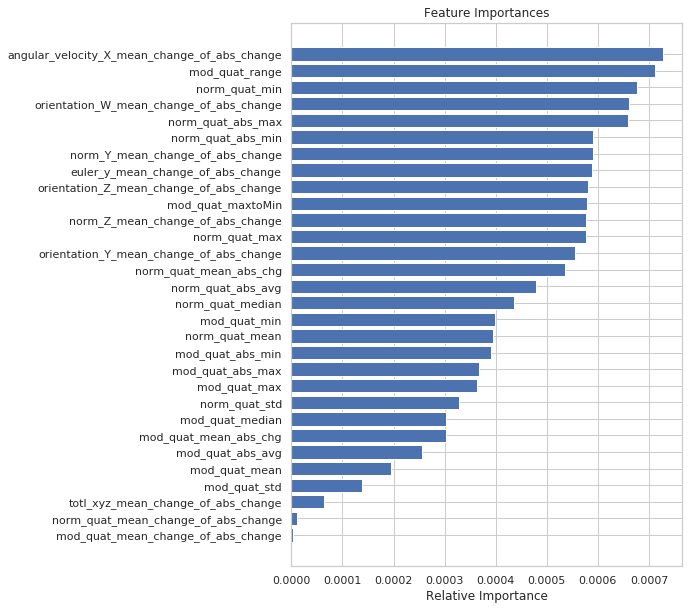

Fold: 1 score: 0.8932291666666666
Fold: 2 score: 0.9190600522193212
Fold: 3 score: 0.9136125654450262
Fold: 4 score: 0.9291338582677166


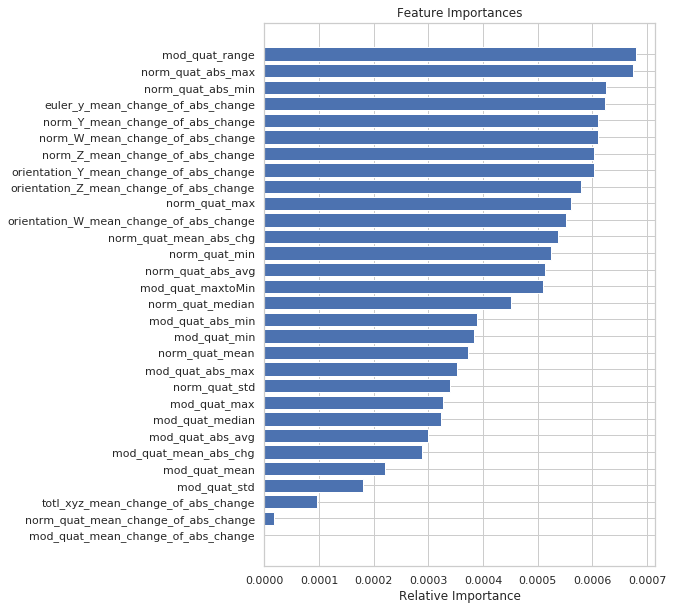

Fold: 5 score: 0.910761154855643
Fold: 6 score: 0.8818897637795275
Fold: 7 score: 0.9261213720316622


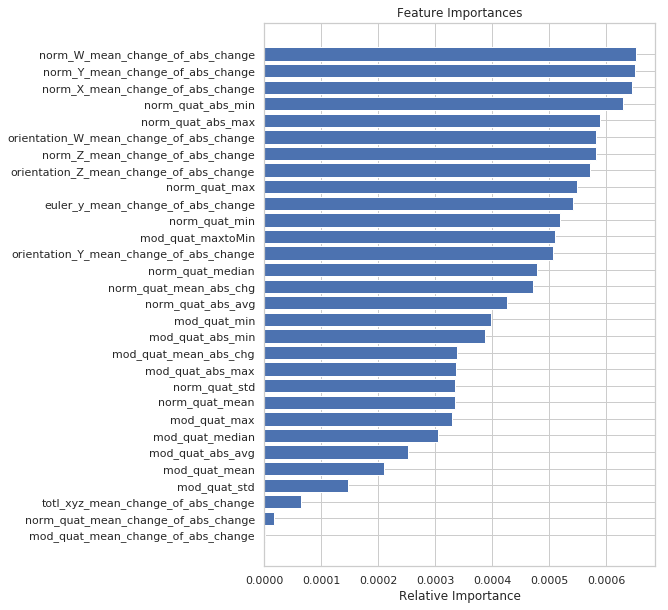

Fold: 8 score: 0.9153439153439153
Fold: 9 score: 0.9361702127659575


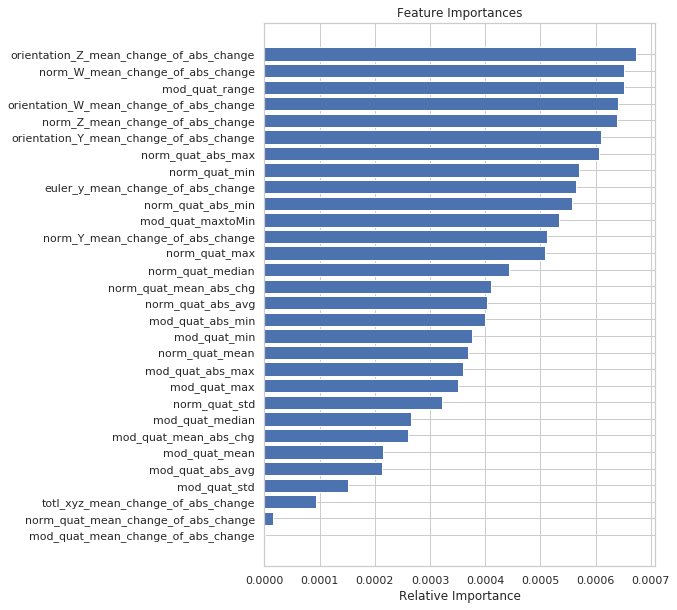

In [61]:
for times, (trn_idx, val_idx) in enumerate(folds.split(data.values,target['surface'].values)):
    model = RandomForestClassifier(n_estimators=500, n_jobs = -1)
    model.fit(data.iloc[trn_idx],target['surface'][trn_idx])
    measured[val_idx] = model.predict(data.iloc[val_idx])
    predicted += model.predict_proba(test)/folds.n_splits
    score += model.score(data.iloc[val_idx],target['surface'][val_idx])
    print("Fold: {} score: {}".format(times,model.score(data.iloc[val_idx],target['surface'][val_idx])))

    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = data.columns
    
    if model.score(data.iloc[val_idx],target['surface'][val_idx]) > 0.92000:
        hm = 30
        plt.figure(figsize=(7, 10))
        plt.title('Feature Importances')
        plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
        plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

    gc.collect()

In [62]:
print('Avg Accuracy RF', score / folds.n_splits)

Avg Accuracy RF 0.914999738605076


In [63]:
confusion_matrix(measured,target['surface'])

array([[162,   5,   0,   0,   1,   3,   0,   2,   0],
       [ 12, 712,  12,   0,  10,  16,   6,  16,  16],
       [  0,   3, 317,   0,   4,   2,   0,   1,   5],
       [  0,   0,   0,  13,   0,   0,   0,   0,   0],
       [  1,   9,   0,   0, 286,   4,   0,   4,   1],
       [  4,  13,   9,   0,   1, 696,   2,   7,  16],
       [  0,  11,   1,   2,   1,   2, 283,   3,   2],
       [  1,   3,   5,   0,   0,   3,   0, 472,  22],
       [  9,  23,  19,   6,   5,   6,   6,   9, 545]])

ماتریس درهم‌ریختگی

In [64]:
# https://www.kaggle.com/artgor/where-do-the-robots-drive

def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

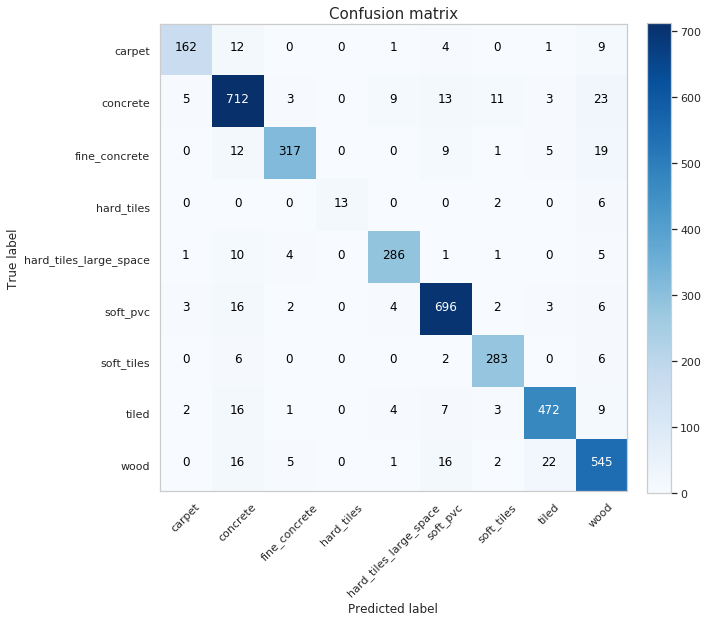

In [65]:
plot_confusion_matrix(target['surface'], measured, le.classes_)

همانطور که مشاهده شد در این مجموعه داده بیشتر کار و زمان اصلی مرتب کردن داده و انتخاب بهترین ویژگی‌ها بوده است. این اتفاق معمولا یک رخداد متداول در مسائل دنیای واقعی یادگیری ماشین است و بیشتر وقت و زمان صرف تصحیح و تکمیل داده می‌شود تا بتوان از آن بهترین نتیجه مورد نظر را گرفت.

در این مسئله فارغ از این اصل نبود و برای پیش بینی یک جنگل تصادفی برای پیش بینی کفایت می‌کرد اما یافتن بهترین ویژگی‌ها برای این کار و تصحیح و یافتن رابطه‌های ویژگی‌ها زمان بر ترین قسمت این مسئله بود.